In [ ]:
import pandas as pd
import joblib
N_CORES = joblib.cpu_count(only_physical_cores = True)

WI_model = joblib.load('../data/WI_pickled/WI_random_forest_model.pkl')
WI_full_df = pd.read_csv('../data/Wisconsin/train_test_split/Wisconsin_closest_five_method.csv')
WI_full_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

8


/opt/homebrew/Caskroom/miniforge/base/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import math
import streamlit as st
import matplotlib
from streamlit_folium import st_folium
from pathlib import Path
import geopandas as gpd
import folium
from shapely import wkt
import pickle
import joblib
N_CORES = joblib.cpu_count(only_physical_cores = True)

here_prefix = ''

@st.cache_data
def load_county_choropleth_data():
    counties_map_data = pd.read_csv(here_prefix + 'States_Counties_Map_Data.csv')
    counties_map_data['Year'] = counties_map_data['Year'].astype(str)
    return counties_map_data[counties_map_data['Year'] == '2022']

def reconstruct_geo(pre_geo_data):
    pre_geo_data['geometry'] = pre_geo_data['geometry'].apply(wkt.loads)
    geo_data = gpd.GeoDataFrame(pre_geo_data, geometry = 'geometry')
    geo_data.set_crs(epsg = 4326, inplace = True)
    return geo_data

pre_county_geo_data = load_county_choropleth_data()
county_geo_data = reconstruct_geo(pre_county_geo_data)

county_geo_data[(county_geo_data['PassRate'].notna()) & (county_geo_data['State_Abbreviation'] == 'WI')]['County'].unique()

2024-12-01 15:50:49.701 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 15:50:50.198 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-12-01 15:50:50.202 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 15:50:50.263 
  command:

    streamlit run /opt/homebrew/Caskroom/miniforge/base/envs/erdos_fall_2024/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-12-01 15:50:50.264 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 15:50:50.265 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 15:50:50.266 No runtime found, using MemoryCacheStorag

array(['Kewaunee', 'Marathon', 'Rusk', 'Taylor', 'Waupaca', 'Wood',
       'Racine', 'Jefferson', 'Sauk', 'Monroe', 'Oneida', 'Price',
       'Richland', 'Eau Claire', 'Iowa', 'Dunn', 'Marinette', 'Rock',
       'Vernon', 'Sawyer', 'Bayfield', 'Calumet', 'Polk', 'Walworth',
       'Winnebago', 'La Crosse', 'Pierce', 'Green', 'St. Croix',
       'Washington', 'Waukesha', 'Dodge', 'Sheboygan', 'Green Lake',
       'Kenosha', 'Clark', 'Adams', 'Lafayette', 'Fond du Lac',
       'Waushara', 'Jackson', 'Outagamie', 'Forest', 'Milwaukee',
       'Oconto', 'Vilas', 'Washburn', 'Columbia', 'Langlade', 'Buffalo',
       'Shawano', 'Crawford', 'Portage', 'Ozaukee', 'Chippewa', 'Burnett',
       'Grant', 'Marquette', 'Trempealeau', 'Door', 'Douglas', 'Dane',
       'Manitowoc', 'Barron', 'Pepin', 'Lincoln', 'Juneau', 'Brown',
       'Ashland'], dtype=object)

In [2]:
def WI_predict_perturb(county = 'Adams', feature = 'population', feature_change = 0):
    try:
        row = pd.DataFrame(WI_full_df[(WI_full_df['COUNTY'] == county) & (WI_full_df['Year'] == 2022)][WI_full_df.columns[8:]].iloc[0]).T
        changed_row = row.copy(deep = True)
        changed_row[feature] = max(row[feature].iloc[0] + feature_change, 0)
        return round(float(WI_model.predict(changed_row)[0]) - float(WI_model.predict(row)[0]), 3)
    except:
        return 0

WI_predict_perturb(county = 'Jackson', feature = 'population', feature_change = 2000)

0.091

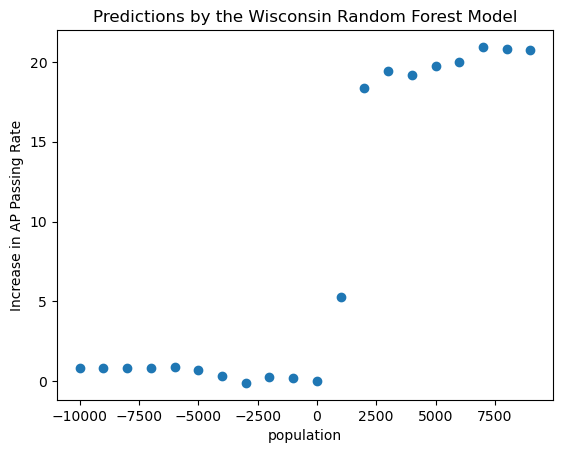

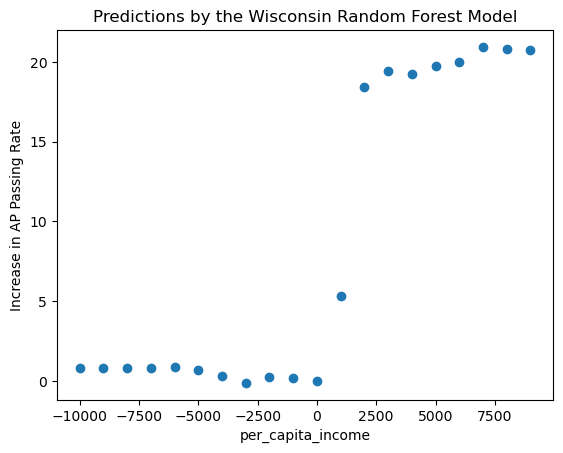

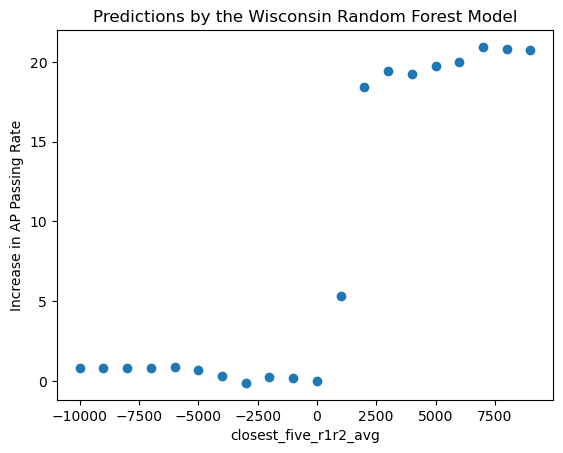

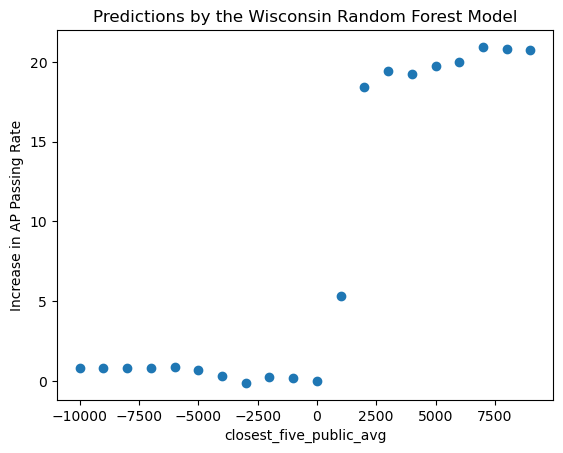

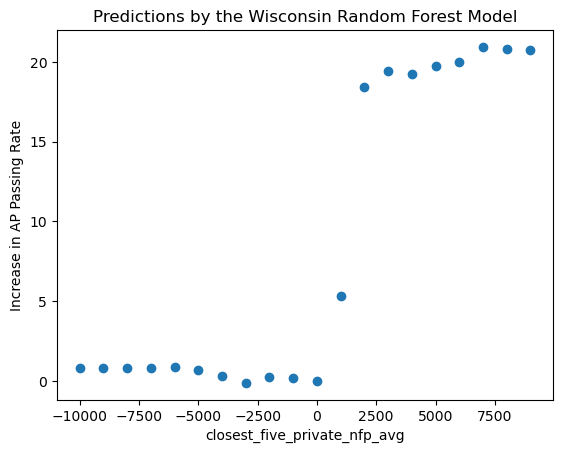

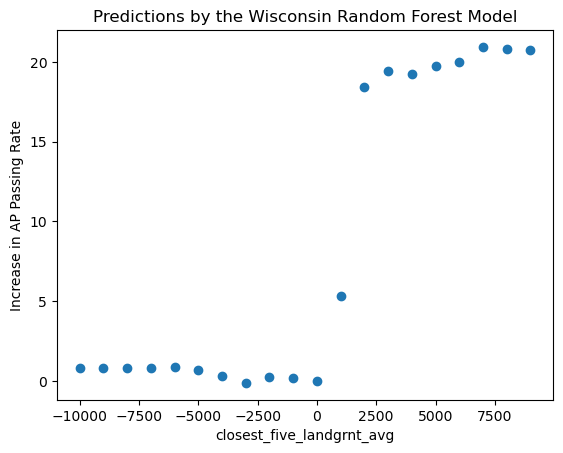

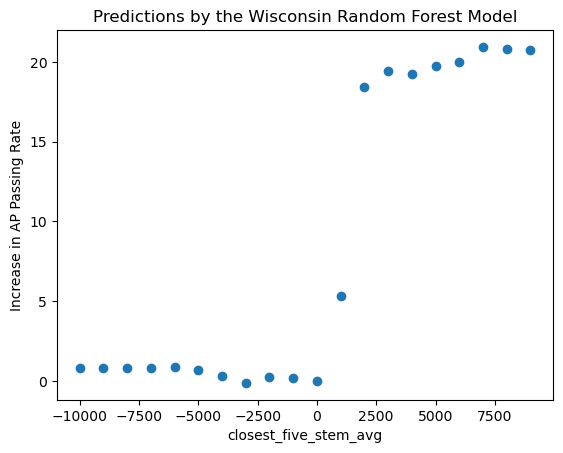

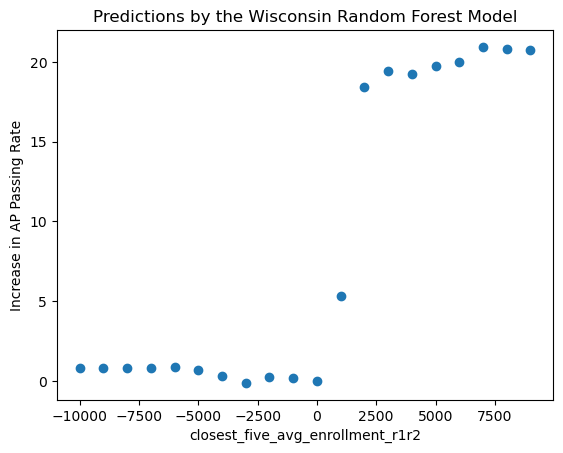

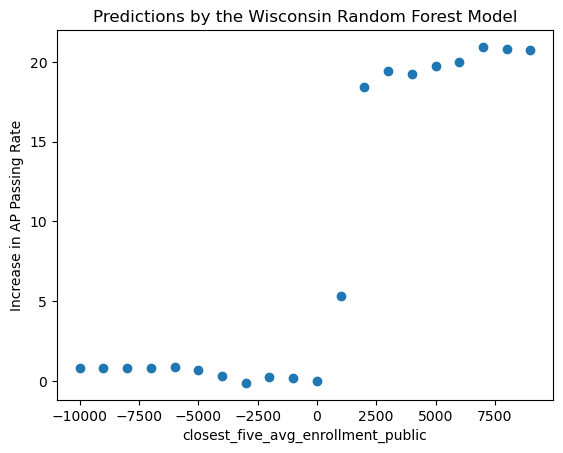

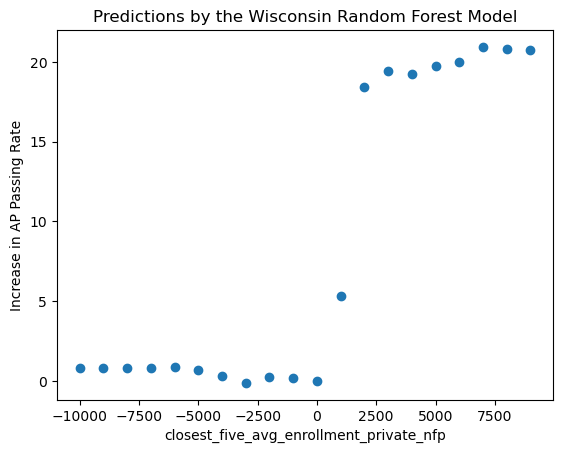

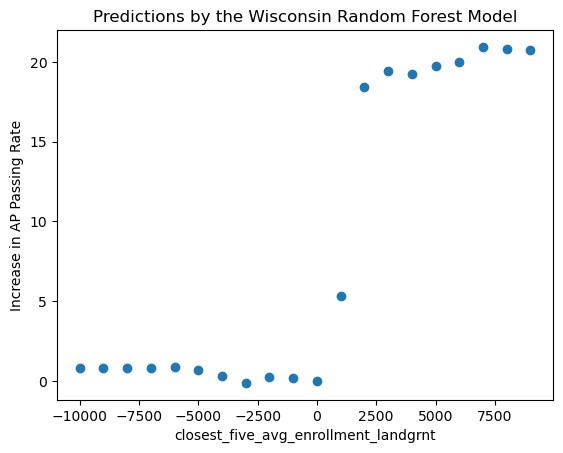

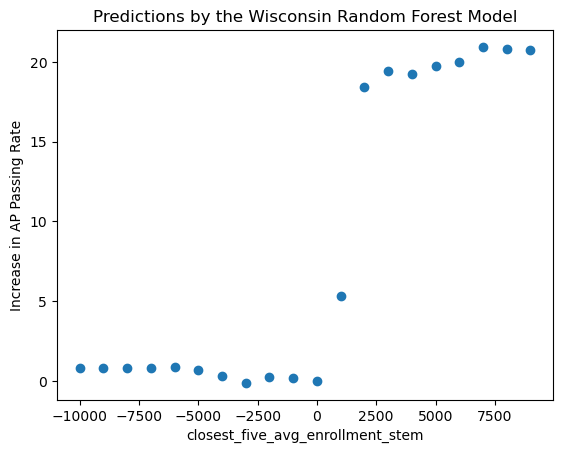

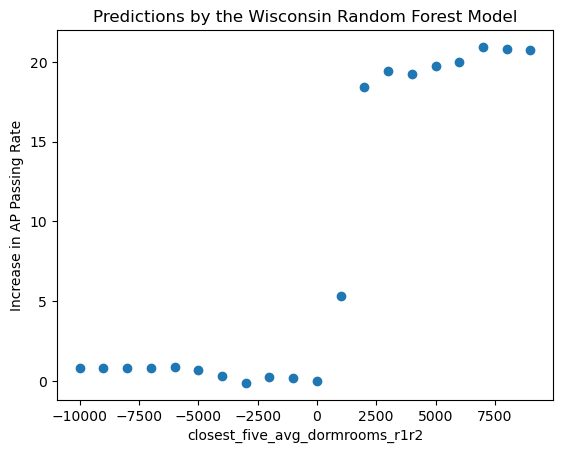

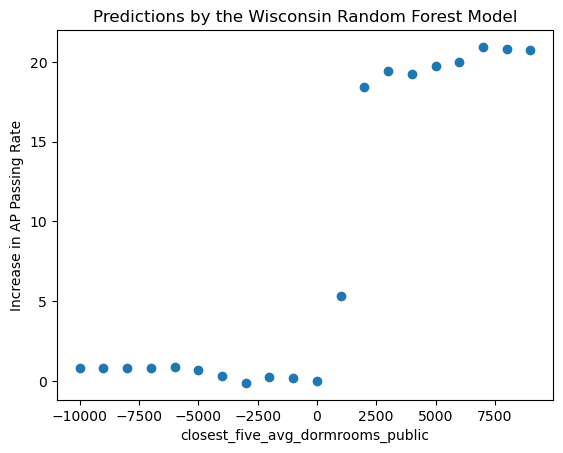

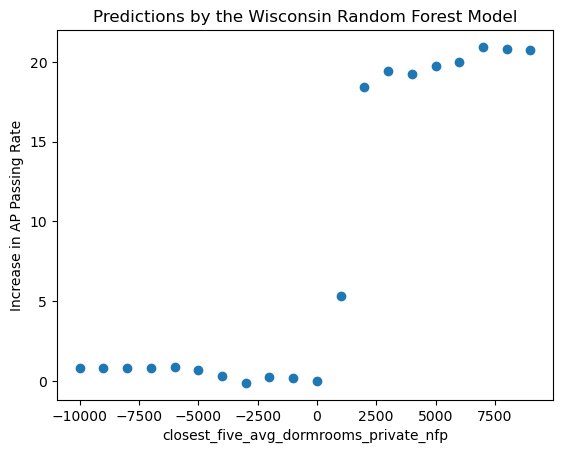

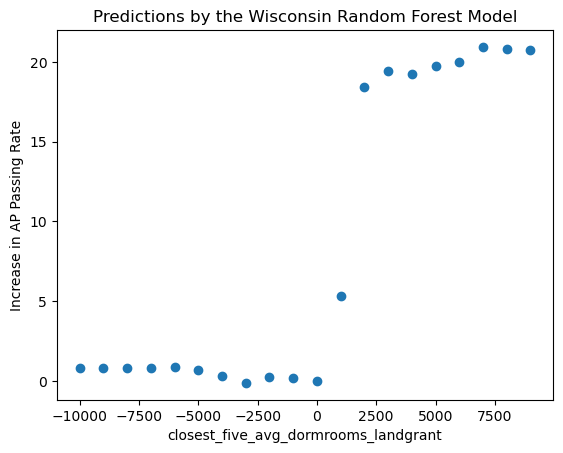

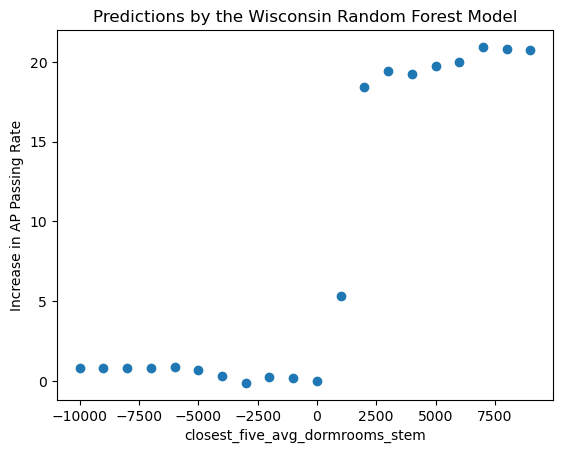

In [115]:
import matplotlib.pyplot as plt
possible_features = ['population',
       'per_capita_income', 'closest_five_r1r2_avg', 'closest_five_public_avg',
       'closest_five_private_nfp_avg', 'closest_five_landgrnt_avg',
       'closest_five_stem_avg', 'closest_five_avg_enrollment_r1r2',
       'closest_five_avg_enrollment_public',
       'closest_five_avg_enrollment_private_nfp',
       'closest_five_avg_enrollment_landgrnt',
       'closest_five_avg_enrollment_stem', 'closest_five_avg_dormrooms_r1r2',
       'closest_five_avg_dormrooms_public',
       'closest_five_avg_dormrooms_private_nfp',
       'closest_five_avg_dormrooms_landgrant',
       'closest_five_avg_dormrooms_stem']

for feature in possible_features:
    X = list(range(-10000, 10000, 1000))
    y = [WI_predict_perturb('Jackson', 'per_capita_income', x) for x in X]

    plt.scatter(X, y)
    plt.xlabel(feature)
    plt.ylabel('Increase in AP Passing Rate')
    plt.title('Predictions by the Wisconsin Random Forest Model')
    plt.show()


In [6]:
from sklearn.metrics import root_mean_squared_error, r2_score
WI_predictions_df = pd.read_csv('../data/WI_2017_predictions.csv').drop(['Unnamed: 0'], axis = 1)
print(f'RMSE: {root_mean_squared_error(WI_predictions_df['PERCENT_3_OR_ABOVE'], WI_predictions_df['MODEL_PREDICTIONS'])}')
print(f'R^2: {r2_score(WI_predictions_df['PERCENT_3_OR_ABOVE'], WI_predictions_df['MODEL_PREDICTIONS'])}')

RMSE: 8.391804784686695
R^2: 0.5618726046268075


In [ ]:
import streamlit as st
import plotly.graph_objects as go

# Sample data
x_points = [1, 2, 3, 4, 5]
y_points = [10, 15, 13, 17, 14]

# Create a Plotly figure
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=x_points, y=y_points, mode='lines+markers', name='Line'))

# Customize layout
fig.update_layout(
    title='Simple Line Chart',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    template='plotly_white'
)

# Display the chart in Streamlit
# st.plotly_chart(fig)

In [ ]:
fig.show()

In [ ]:
import streamlit as st
import plotly.graph_objects as go

x_points = [1, 2, 3, 4, 5]
y_points = [10, 15, 13, 17, 14]
fixed_point = (3, 13)


# st.plotly_chart(fig)


In [ ]:
fig.show()